In [1]:
## This is a short demonstration of some of the things
## python can do for you, and a preview to some of the
## things we'll learn in the course

print('I\'m ready for my life to be improved')

I'm ready for my life to be improved


In [2]:
## Lets import some modules we'll need later!
## This might take a minute. You can tell the cell is still
## working because of the little [*] next to the 'ln' symbol 
## to the left.

import os
import subprocess
import math
import pandas
from glob import glob
from scipy import stats,linalg
from scipy.io import savemat
import numpy as np
import networkx as nx
from matplotlib import pyplot,patches
# you probably won't be able to import these two unless you've downloaded the libraries
import nipype
import nibabel as ni


In [3]:
################ PART 1: COMMAND LINE ###################
## First, I'll show you a bit about how python can help you automate
## command line functions

# let's create a few empty files for demonstration purposes
print('here is our directory before creating the files. . . \n')
print(os.listdir())
for i in range(10):
    os.system('touch empty_fl_%s'%i)
print('\n . . . and after')
os.listdir()

here is our directory before creating the files. . . 

['.git', '.ipynb_checkpoints', 'PyDemo.ipynb', 'README.md', 'stuff']

 . . . and after


['.git',
 '.ipynb_checkpoints',
 'empty_fl_0',
 'empty_fl_1',
 'empty_fl_2',
 'empty_fl_3',
 'empty_fl_4',
 'empty_fl_5',
 'empty_fl_6',
 'empty_fl_7',
 'empty_fl_8',
 'empty_fl_9',
 'PyDemo.ipynb',
 'README.md',
 'stuff']

In [4]:
# let's say we want to rename these files given a list of subject IDs

# generate a list of random subject IDs
ids = np.random.randint(1000,5000,10)
print('here is a list of the IDs we\'ve generated')
print(sorted(ids))
print('\n')

# collect files that we created
fls = sorted(glob(os.path.join(os.getcwd(),'empty_fl*')))
print('here are the files')
print(fls)
print ('\n')

# rename files using subject IDs
for i,fl in enumerate(fls):
    pth,flnm = os.path.split(fl)
    fl_parts = flnm.split('_')
    os.system('mv %s %s'%(fl,os.path.join(pth,'%s_%s_s%s'%(fl_parts[0],fl_parts[1],ids[i]))))

# now we'll list contents again to see if the files were renamed
print('here are the directory contents')
os.listdir()

here is a list of the IDs we've generated
[1109, 1229, 1961, 2695, 3097, 3510, 3851, 4206, 4560, 4931]


here are the files
['/Users/jakevogel/git/pycourse_vuMC/empty_fl_0', '/Users/jakevogel/git/pycourse_vuMC/empty_fl_1', '/Users/jakevogel/git/pycourse_vuMC/empty_fl_2', '/Users/jakevogel/git/pycourse_vuMC/empty_fl_3', '/Users/jakevogel/git/pycourse_vuMC/empty_fl_4', '/Users/jakevogel/git/pycourse_vuMC/empty_fl_5', '/Users/jakevogel/git/pycourse_vuMC/empty_fl_6', '/Users/jakevogel/git/pycourse_vuMC/empty_fl_7', '/Users/jakevogel/git/pycourse_vuMC/empty_fl_8', '/Users/jakevogel/git/pycourse_vuMC/empty_fl_9']


here are the directory contents


['.git',
 '.ipynb_checkpoints',
 'empty_fl_s1109',
 'empty_fl_s1229',
 'empty_fl_s1961',
 'empty_fl_s2695',
 'empty_fl_s3097',
 'empty_fl_s3510',
 'empty_fl_s3851',
 'empty_fl_s4206',
 'empty_fl_s4560',
 'empty_fl_s4931',
 'PyDemo.ipynb',
 'README.md',
 'stuff']

In [5]:
# now lets get rid of those files.. we don't need them
os.system('rm empty*')

print('directory contents')
os.listdir()

directory contents


['.git', '.ipynb_checkpoints', 'PyDemo.ipynb', 'README.md', 'stuff']

In [6]:
## Python can be used to automate any terminal commands
## This includes neuroimaging tools like fsl. 
## Here, we will extract average effect (t) values for three 
## different subjects within a set of 7 masks taken from an 
## atlas of functional brain networks

# collect subjects and atlas
stuff_dir = os.path.join(pth,'stuff')
subs = sorted(glob(os.path.join(stuff_dir,'rw*')))
msk = os.path.join(stuff_dir,'networks_scale7.nii.gz')
print('here is a list of our subjects')
print(subs)
print('\n and our atlas')
print(msk)



here is a list of our subjects
['/Users/jakevogel/git/pycourse_vuMC/stuff/rw_164071.nii.gz', '/Users/jakevogel/git/pycourse_vuMC/stuff/rw_164879.nii.gz', '/Users/jakevogel/git/pycourse_vuMC/stuff/rw_165177.nii.gz']

 and our atlas
/Users/jakevogel/git/pycourse_vuMC/stuff/networks_scale7.nii.gz


In [7]:
# lets also make a dataframe to collect the values
sub_ids = []
for sub in subs:
    sid = os.path.split(sub)[1].split('.')[0]
    sub_ids.append(sid)

cols = []
for i in range(7):
    cols.append('network_%s'%i)
 
df = pandas.DataFrame(index=sub_ids,columns=cols)
print(df)

          network_0 network_1 network_2 network_3 network_4 network_5  \
rw_164071       NaN       NaN       NaN       NaN       NaN       NaN   
rw_164879       NaN       NaN       NaN       NaN       NaN       NaN   
rw_165177       NaN       NaN       NaN       NaN       NaN       NaN   

          network_6  
rw_164071       NaN  
rw_164879       NaN  
rw_165177       NaN  


In [8]:
# now lets actually perform the command

# go to the directory
os.chdir(stuff_dir)

# for each network
for i in range(7):
    # make mask of network using fslmaths
    os.system('fslmaths %s -thr %s -uthr %s msk%s'%(msk,(i+1),(i+1),i)) 
    # for each subject
    for x,sub in enumerate(subs):
        # mask subject with mask using fslmaths
        os.system('fslmaths %s -mas msk%s.nii.gz mskd_img'%(sub,i))
        # get mean within mask by reading output from fslstats command
        val = float(subprocess.check_output('fslstats mskd_img.nii.gz -M',shell=True))
        # print value to keep track of progress
        print('the mean value for subject %s in network %s is %s'%(sub_ids[x],i,val))
        # write to DataFrame
        df.ix[sub_ids[x],'network_%s'%(i)] = val
# get rid of scrap
os.system('rm msk*.ni*')

print('\n and here is our dataframe again with the values filled in \n')
print(df)
    

the mean value for subject rw_164071 in network 0 is -0.401862
the mean value for subject rw_164879 in network 0 is -0.550005
the mean value for subject rw_165177 in network 0 is -0.484047
the mean value for subject rw_164071 in network 1 is -0.370646
the mean value for subject rw_164879 in network 1 is -0.70153
the mean value for subject rw_165177 in network 1 is -0.084874
the mean value for subject rw_164071 in network 2 is 0.046695
the mean value for subject rw_164879 in network 2 is -0.474224
the mean value for subject rw_165177 in network 2 is 0.244014
the mean value for subject rw_164071 in network 3 is -0.359564
the mean value for subject rw_164879 in network 3 is -0.335933
the mean value for subject rw_165177 in network 3 is -0.50387
the mean value for subject rw_164071 in network 4 is -0.005683
the mean value for subject rw_164879 in network 4 is -0.464728
the mean value for subject rw_165177 in network 4 is -0.379618
the mean value for subject rw_164071 in network 5 is -0.000

In [9]:
######### PART 2: SPREADSHEETS ############
## Using pandas lets us open spreadsheets with ease

# let's turn that dataframe into an actual file that can be read
# what are our options?
#df.to_

df.to_excel('networks.xls')
os.listdir()

# we can also read in files of almost any text type using pandas
ndf = pandas.ExcelFile('networks.xls').parse('Sheet1')

print(ndf)



           network_0  network_1  network_2  network_3  network_4  network_5  \
rw_164071  -0.401862  -0.370646   0.046695  -0.359564  -0.005683  -0.000927   
rw_164879  -0.550005  -0.701530  -0.474224  -0.335933  -0.464728  -0.153233   
rw_165177  -0.484047  -0.084874   0.244014  -0.503870  -0.379618  -0.450190   

           network_6  
rw_164071  -0.127058  
rw_164879  -0.218117  
rw_165177  -0.245535  


In [10]:
# there are many nice features of pandas
print('slicing is easy: \n')

print('all networks for subject %s'%(sub_ids[0]))
print(ndf.ix[sub_ids[0]],'\n')
print('all subject values for network 0')
print(ndf.ix[:,cols[0]],'\n')

print('so is indexing: \n')
print('value for subject %s, network 4'%(sub_ids[1]))
print(ndf.ix[sub_ids[1],cols[4]],'\n')

print('there also many things you can do to summarize or manipulate individual slices \n')
slc = ndf.ix[:,cols[0]]
print('here is the mean value across all networks for subject 0 \n')
print(slc.mean())

slicing is easy: 

all networks for subject rw_164071
network_0   -0.401862
network_1   -0.370646
network_2    0.046695
network_3   -0.359564
network_4   -0.005683
network_5   -0.000927
network_6   -0.127058
Name: rw_164071, dtype: float64 

all subject values for network 0
rw_164071   -0.401862
rw_164879   -0.550005
rw_165177   -0.484047
Name: network_0, dtype: float64 

so is indexing: 

value for subject rw_164879, network 4
-0.464728 

there also many things you can do to summarize or manipulate individual slices 

here is the mean value across all networks for subject 0 

-0.47863799999999995


In [11]:
########## PART 3: MATH AND STATS ############
## Python has an array of different libraries available for performing 
## mathematical operations. This ranges from simple mathematical commmands
## to basic stats like regression/t-tests, to complex deep learning
## algorithms such as clustering and support vector machines.

# lets make z-scores for each network from the data we just produced

# first we'll make a quick z-score function
def z_score(val,mn,sd): 
    scr = (val - mn) / sd
    return scr

# next, we'll get the means and SDs of each network and store them
# in a dictionary
net_stz = {}
for i in range(7):
    slc = df[:]['network_%s'%(i)]
    net_stz.update({'network_%s'%(i): (slc.mean(),slc.std())})
print('here are the means and sds for each network \n')
print(net_stz,'\n')
    
# now we'll apply it to each subject's data
for sub in df.index.tolist():
    for col in cols:
        val = df.ix[sub,col]
        df.ix[sub,'z_%s'%(col)] = z_score(val,net_stz[col][0],net_stz[col][1])

print('here are the new z-scored values')
print(df[:][df.columns[7:]])
        

here are the means and sds for each network 

{'network_2': (-0.061171666666666659, 0.37106989839426929), 'network_4': (-0.28334299999999996, 0.24419712267960897), 'network_6': (-0.19690333333333335, 0.062021888251917429), 'network_0': (-0.47863799999999995, 0.074219472330379704), 'network_1': (-0.38568333333333332, 0.30860289471962726), 'network_3': (-0.39978900000000001, 0.090907903732293849), 'network_5': (-0.20144999999999999, 0.22847969299042747)} 

here are the new z-scored values
           z_network_0  z_network_1  z_network_2  z_network_3  z_network_4  \
rw_164071     1.034446     0.048727     0.290691     0.442481     1.137032   
rw_164879    -0.961567    -1.023473    -1.113139     0.702425    -0.742781   
rw_165177    -0.072878     0.974746     0.822448    -1.144906    -0.394251   

           z_network_5  z_network_6  
rw_164071     0.877640     1.126140  
rw_164879     0.211034    -0.342035  
rw_165177    -1.088674    -0.784105  


here is our matrix 
 [[ 0.95799889  0.78477013  0.21596058 ...,  0.7967284   0.0535588
   0.32540913]
 [ 0.78477013  0.29049199  0.31894715 ...,  0.66228939  0.43150564
   0.61716809]
 [ 0.21596058  0.31894715  0.70225711 ...,  0.94540372  0.30790493
   0.17228481]
 ..., 
 [ 0.7967284   0.66228939  0.94540372 ...,  0.39449585  0.0444052
   0.84780754]
 [ 0.0535588   0.43150564  0.30790493 ...,  0.0444052   0.80625177
   0.09251942]
 [ 0.32540913  0.61716809  0.17228481 ...,  0.84780754  0.09251942
   0.27411042]]

 and here is what it looks like visualized


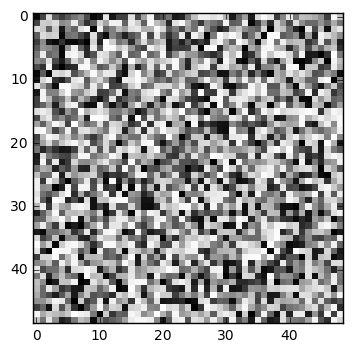

In [12]:
## we can also calculate something slightly more complicated,
## we'll make a fake correlation matrix from scratch, look for
## networks using clustering analysis, and then calculate the 
## some graph theory metrics

# generate random connectivity matrix
gen_mtx = np.random.random((49,49))

# now make its symettrical like a real connectivity matrix
diag = gen_mtx.diagonal()
lo_tri = np.tril(gen_mtx)
up_tri = lo_tri.transpose()
mtx = lo_tri + up_tri
for i in range(49):
    mtx[i][i] = diag[i]
    
print('here is our matrix \n',mtx)
print('\n and here is what it looks like visualized')
pyplot.imshow(mtx,
              cmap="Greys",
              interpolation="none")
pyplot.show()
    




now here's the new matrix!


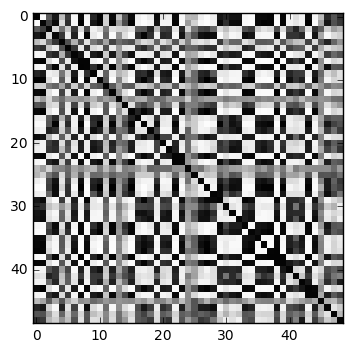

In [13]:
# and lets make use partial correlations to make it slightly more sparse
def partial_corr(C):
    C = np.asarray(C)
    p = C.shape[1]
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i+1, p):
            idx = np.ones(p, dtype=np.bool)
            idx[i] = False
            idx[j] = False
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0]
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]

            res_j = C[:, j] - C[:, idx].dot( beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
            
            corr = stats.pearsonr(res_i, res_j)[0]
            P_corr[i, j] = corr
            P_corr[j, i] = corr
        
    return P_corr

pc_mtx = partial_corr(mtx)
for i in range(49):
    pc_mtx[i][i] = diag[0]

print('now here\'s the new matrix!')
pyplot.imshow(pc_mtx,
              cmap="Greys",
              interpolation="none")
pyplot.show()
        


and here is our matrix reordered by cluster membership


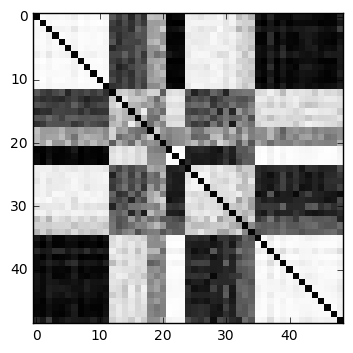

wow, doesn't it look like there is something real happening here?


In [14]:
# Let's make some sense out of this nonsense. We'll run clustering
# analysis on our random connectivity matrix

from sklearn.cluster import KMeans
# run clustering analysis and get labels
kmeans = KMeans(n_clusters=7, random_state=0).fit(pc_mtx)
labz = kmeans.labels_.tolist()
# reorder connectivity matrix by cluster labels
naxis = []
for x in range(7):
    for i in range(49):
        if labz[i] == x:
            naxis.append(i)
npc_mtx = pc_mtx[:, naxis][naxis]

print('and here is our matrix reordered by cluster membership')
pyplot.imshow(npc_mtx,
              cmap="Greys",
              interpolation="none")
pyplot.show()
print('wow, doesn\'t it look like there is something real happening here?')

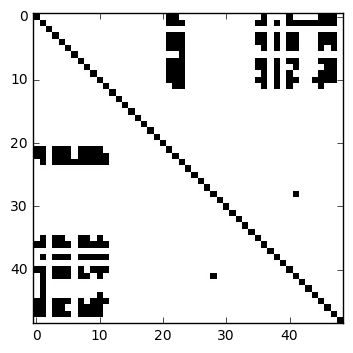

as this is random data, the binarized matrix is not very pretty


{0: 9,
 1: 16,
 2: 2,
 3: 8,
 4: 2,
 5: 2,
 6: 2,
 7: 12,
 8: 13,
 9: 2,
 10: 11,
 11: 2,
 12: 11,
 13: 2,
 14: 2,
 15: 12,
 16: 2,
 17: 13,
 18: 2,
 19: 2,
 20: 2,
 21: 2,
 22: 11,
 23: 11,
 24: 2,
 25: 2,
 26: 3,
 27: 13,
 28: 3,
 29: 10,
 30: 2,
 31: 3,
 32: 3,
 33: 11,
 34: 11,
 35: 4,
 36: 11,
 37: 10,
 38: 14,
 39: 11,
 40: 2,
 41: 2,
 42: 2,
 43: 12,
 44: 8,
 45: 2,
 46: 2,
 47: 2,
 48: 2}

In [17]:
## We could do the graph theory metrics by hand, but we don't
## have to. There are specialized python functions that do the 
## dirty work for you for almost anything you could think of,
## and graph theory is no exception

## first lets convert this to a binarized matrix where we save
## only the top 10% of connections

flat = np.tril(pc_mtx).flatten()
flat = [abs(x) for x in flat]
top_no = int(len(flat) * 0.90)
top_10 = sorted(flat)[top_no]
bin_mtx = np.full((49,49),np.nan)
for i in range(49):
    for j in range(49):
        if pc_mtx[i][j] > top_10:
            bin_mtx[i][j] = 1
        else:
            bin_mtx[i][j] = 0
nbin_mtx = bin_mtx[:, naxis][naxis]
pyplot.imshow(nbin_mtx,
              cmap="Greys",
              interpolation="none")
pyplot.show()
print('as this is random data, the binarized matrix is not very pretty')

# but assuming we had a real matrix it would look better
# Lets run some graph metrix. Choose your poison

G = nx.from_numpy_matrix(bin_mtx)
nx.degree(G)


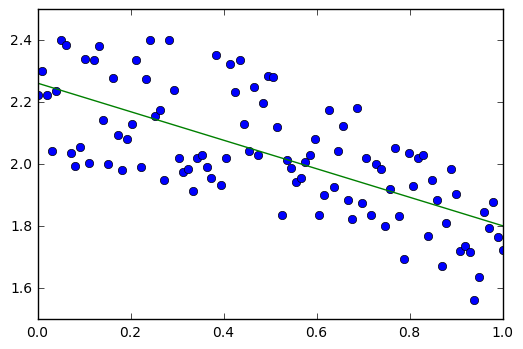

r = -0.695717859803, p = 9.48732831113e-16


In [18]:
## we can also run more traditional statistics like correlations
## lets generate some fake data and run a correlation

# here's some fake data
x = np.linspace(0, 1, 100)
y = (np.cos(x) + 0.5*np.random.rand(100)) + np.random.ranf()
#y = (x + np.random.rand(100)) - np.random.ranf()
p = np.poly1d(np.polyfit(x, y, 1))
t = np.linspace(0, 1, 100)
pyplot.plot(x, y, 'o', t, p(t), '-')
pyplot.show()

# lets test it!
r,pval = stats.pearsonr(x,y)
print('r = %s, p = %s'%(r,pval))

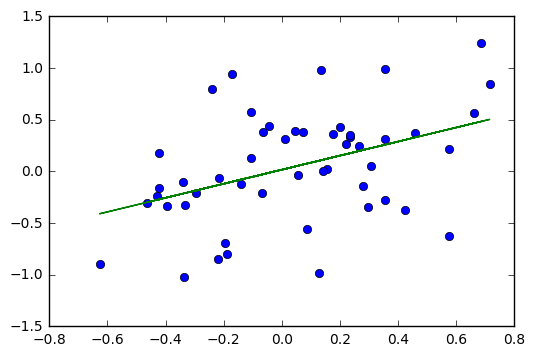

r = 0.420779618418, p = 0.00234436607859


In [22]:
## That's all well and good, but with Python, we can add another level
## of sophistication through automation: random sampling methods

## Let's generate some fake data again.
## But this time, lets make the correlation less tight
## And to show off the versatility of python, let's use completely different
## commands to generate the data and to plot

# generate fake data
xx = np.array([-1, 1])
yy = np.array([-1.5, 1.5])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.3         # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

# get plotting paramaters
ms = np.random.multivariate_normal(means, covs, 50).T
slp,inter = np.polyfit(ms[0],ms[1],1)

# plot
pyplot.plot(ms[0],ms[1], 'o')
pyplot.plot(ms[0],slp*ms[0]+inter,'-')

pyplot.show()

# run stats
r,pval = stats.pearsonr(ms[0],ms[1])
print('r = %s, p = %s'%(r,pval))

permuted 10000 samples in 1.2566377790644765 seconds 

here is our distribution of r-values


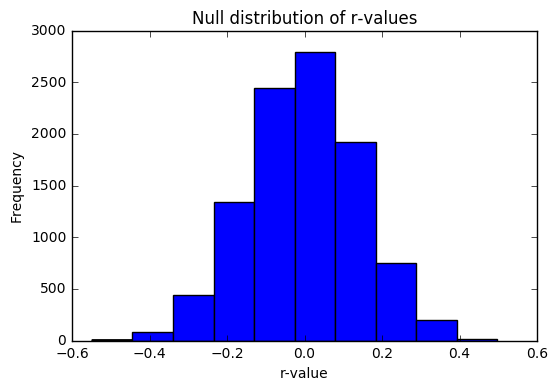

In [23]:
## let's say we wanted to resample the data to establish exact p-values
## we can shuffle x (with replacement) over 10,000 permutations 

## let's also time it..
import timeit

distr = []
start_time = timeit.default_timer()
for i in range(10000):
    new_x = np.random.permutation(ms[0].tolist())
    new_r,new_p = stats.pearsonr(new_x,ms[1])
    distr.append(new_r)
elapsed = timeit.default_timer() - start_time

print('permuted %s samples in %s seconds \n'%(len(distr),elapsed))# 

pyplot.hist(distr)
pyplot.title("Null distribution of r-values")
pyplot.xlabel("r-value")
pyplot.ylabel("Frequency")


print('here is our distribution of r-values')
pyplot.show()



the exact p-value is 0.00039996000399960006 

the black line is the observed r-value
the dotted red line represents p<0.05 (one tailed)
the solid red line represents p<0.025 (two tailed)


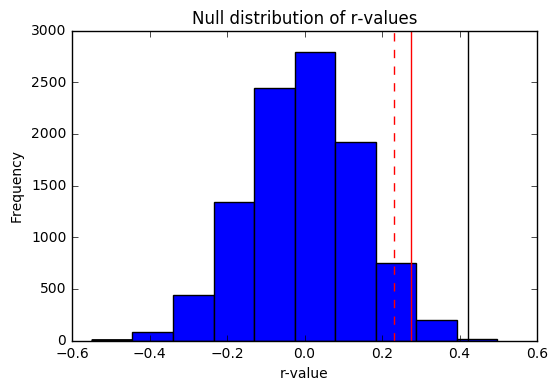

0.00039996000399960006
0.231562289119
0.275427278857


In [24]:
# now lets find our p-value and test the hypothesis that the
# correlation did not occur from chance

# assess null distribution to establish p-value
slicer = []
for v in sorted(distr):
    if v > r:
        slicer.append(v)
exact_p = len(slicer)/float((len(distr)+1))


# what r-value is p<0.05?
sig_r = sorted(distr)[int((1-0.05) * len(distr))]
# what r-value is p<0.025 (two tailed)
sig_r2 = sorted(distr)[int((1-0.025) * len(distr))]

# let's have a look
print('the exact p-value is %s \n'%(exact_p))
print('the black line is the observed r-value')
print('the dotted red line represents p<0.05 (one tailed)')
print('the solid red line represents p<0.025 (two tailed)')

pyplot.hist(distr,color='blue')
pyplot.title("Null distribution of r-values")
pyplot.xlabel("r-value")
pyplot.ylabel("Frequency")
pyplot.axvline(x=sig_r,color='red',linestyle='dashed')
pyplot.axvline(x=r,color='black')
pyplot.axvline(x=sig_r2,color='red')
pyplot.show()

print(exact_p)
print(sig_r)
print(sig_r2)

In [25]:
######## PART 4: Loading, saving and manipulating images ###########
## None of this would be much good if you couldn't use it to deal with
## actual imaging data. Luckily, python can handle that too.

# let's take the first subject scan from earlier
print('woring on subject %s'%(subs[0]))
img = ni.load(subs[0])

print('now we have access to the affine... \n')
print(img.affine)
print('\n and the header...\n')
print(img.header)
print('\n and the actual image data, which is a matrix of shape %s,%s,%s \n'%(img.shape[0],
                                                                                img.shape[1],
                                                                                img.shape[2]))
print(img.get_data())

print('\n',img.get_data()[:][40][40])

woring on subject /Users/jakevogel/git/pycourse_vuMC/stuff/rw_164071.nii.gz
now we have access to the affine... 

[[   3.    0.    0.  -78.]
 [   0.    3.    0. -112.]
 [   0.    0.    3.  -68.]
 [   0.    0.    0.    1.]]

 and the header...

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 53 64 52  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [ 1.  3.  3.  3.  1.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL5.0'
aux_file 

In [26]:
## You can perform analyses on these matrices just like you would any other
## and can easily save the data back into a new images.
## Just as a simple example, we'll threshold each image so that only top 5%
## of non-zero values of each image shown, and then we'll binarize it to make 
## a mask.

#and lets time it!
start_time = timeit.default_timer()

for sub in subs:
    # get data and affine (for later)
    s_img = ni.load(sub)
    s_data = s_img.get_data()
    s_aff = s_img.affine
    sx,sy,sz = s_img.shape
    # figure out 5% threshold for non-zero values
    s_distr = []
    for i in range(sx):
        for j in range(sy):
            for k in range(sz):
                if s_data[i][j][k] > 1:
                    s_distr.append(s_data[i][j][k])
    thr = sorted(s_distr)[int(len(s_distr) * 0.95)]
    print('value threshold for subject %s is %s'%(sub,thr))
    # binarize image
    s_bin = np.where(s_data>thr,1,0)
    # save new binarized, thresholded image
    pth,flnm = os.path.split(sub)
    nflnm = os.path.join(pth,'%s_p05mask.nii.gz'%(flnm.split('.')[0]))
    n_img = ni.Nifti1Image(s_bin, s_aff)
    n_img.to_filename(nflnm)
    print('image written to %s \n'%(nflnm))

elapsed = timeit.default_timer() - start_time
print('\n manipulation performed on 3 images in %s seconds'%(elapsed))
print('assuming linear scaling, that would mean 300 subjects would take %s minutes'%((100*elapsed)/60))


value threshold for subject /Users/jakevogel/git/pycourse_vuMC/stuff/rw_164071.nii.gz is 2.3697924614
image written to /Users/jakevogel/git/pycourse_vuMC/stuff/rw_164071_p05mask.nii.gz 

value threshold for subject /Users/jakevogel/git/pycourse_vuMC/stuff/rw_164879.nii.gz is 2.62485074997
image written to /Users/jakevogel/git/pycourse_vuMC/stuff/rw_164879_p05mask.nii.gz 

value threshold for subject /Users/jakevogel/git/pycourse_vuMC/stuff/rw_165177.nii.gz is 2.6587023735
image written to /Users/jakevogel/git/pycourse_vuMC/stuff/rw_165177_p05mask.nii.gz 


 manipulation performed on 3 images in 1.038915773970075 seconds
assuming linear scaling, that would mean 300 subjects would take 1.731526289950125 minutes


In [27]:
## Some poor souls hang nostalgically onto MatLab, believing
## everything on earth is best represented my matrices, and that
## all things should be followed by a ;
## Luckily for those poor souls, we can easily export anything to a
## .mat file that is compatible with matlab.

# We still have our matrix from before. Let's make it into a matfile

# First convert to a dictionary
mat_dict = {'fake_matrix': pc_mtx}

# Save the file
savemat('new_matfile',mat_dict)

os.listdir()

['networks.xls',
 'networks_scale7.nii.gz',
 'new_matfile.mat',
 'rw_164071.nii.gz',
 'rw_164071_p05mask.nii.gz',
 'rw_164879.nii.gz',
 'rw_164879_p05mask.nii.gz',
 'rw_165177.nii.gz',
 'rw_165177_p05mask.nii.gz',
 'w_164071.nii.gz',
 'w_164879.nii.gz',
 'w_165177.nii.gz']

In [28]:
import nipype.interfaces.fsl as fsl

In [ ]:
fsl.preprocess.

In [29]:
subs = glob(os.path.join(pth,'w*'))
ref = '/Users/jakevogel/bellec_lab/aaic/rMNI152_T1_2mm_brain.nii'
flt = fsl.preprocess.FLIRT()
for sub in subs:
    flt.inputs.in_file = sub
    flt.inputs.reference = ref
    flt.inputs.output_type = 'NIFTI_GZ'
    flt.inputs.interp = 'nearestneighbour'
    flt.cmdline
    flt.run()
#flt = fsl.FLIRT()
#flt.inp


In [30]:
os.listdir()

['networks.xls',
 'networks_scale7.nii.gz',
 'new_matfile.mat',
 'rw_164071.nii.gz',
 'rw_164071_p05mask.nii.gz',
 'rw_164879.nii.gz',
 'rw_164879_p05mask.nii.gz',
 'rw_165177.nii.gz',
 'rw_165177_p05mask.nii.gz',
 'w_164071.nii.gz',
 'w_164071_flirt.mat',
 'w_164071_flirt.nii.gz',
 'w_164879.nii.gz',
 'w_164879_flirt.mat',
 'w_164879_flirt.nii.gz',
 'w_165177.nii.gz',
 'w_165177_flirt.mat',
 'w_165177_flirt.nii.gz']

In [31]:
# clean up
os.system('rm *p05*')
os.system('rm *flirt*')
os.system('rm *.mat')
os.system('rm *xls')

0